# Keras : Neural Networks using MNIST dataset #

## Reference

In this notebook we are going to discover the neural networks and we are going to use MNIST dataset to create a neural network using KERAS. This tutorial is created by Dr. Jason Brownlee and here is the link to the original source: http://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/

## Introduction
A popular demonstration of the capability of deep learning techniques is object recognition in image data.

In this tutorial you will discover how to develop a deep learning model to achieve near state of the art performance on the MNIST handwritten digit recognition task in Python using the Keras deep learning library.

## Load Data ##

Using TensorFlow backend.


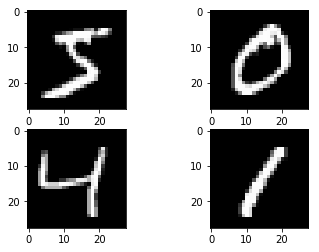

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

You can get very good results using a very simple neural network model with a single hidden layer.

In [2]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

When we work with machine learning algorithms that use a stochastic process (random numbers), it is a good idea to set the random number seed.

In [3]:
# fix random seed 
seed = 7
numpy.random.seed(seed)

In [4]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

We can reduce our memory requirements by fixing the precision of the pixel values to be 32 bit, it's the default precision used by Keras.

In [5]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

We can normalize the pixel values to the range 0 and 1 by dividing each value by 255.

In [6]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

Finally, the output variable is an integer from 0 to 9. This is a multi-class classification problem. As such, it is good practice to use a one hot encoding of the class values, transforming the vector of class integers into a binary matrix.

In [7]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

We are now ready to create our simple neural network model. We will define our model in a function. This is handy if you want to extend the example later and try and get a better score.

In [8]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, init='normal', activation='relu'))
	model.add(Dense(num_classes, init='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

Finally, the test dataset is used to evaluate the model and a classification error rate is printed.

In [9]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
9s - loss: 0.2831 - acc: 0.9190 - val_loss: 0.1395 - val_acc: 0.9590
Epoch 2/10
9s - loss: 0.1123 - acc: 0.9672 - val_loss: 0.0939 - val_acc: 0.9716
Epoch 3/10
9s - loss: 0.0726 - acc: 0.9793 - val_loss: 0.0789 - val_acc: 0.9761
Epoch 4/10
9s - loss: 0.0512 - acc: 0.9854 - val_loss: 0.0739 - val_acc: 0.9780
Epoch 5/10
9s - loss: 0.0377 - acc: 0.9894 - val_loss: 0.0681 - val_acc: 0.9784
Epoch 6/10
9s - loss: 0.0270 - acc: 0.9929 - val_loss: 0.0650 - val_acc: 0.9800
Epoch 7/10
9s - loss: 0.0208 - acc: 0.9947 - val_loss: 0.0588 - val_acc: 0.9819
Epoch 8/10
9s - loss: 0.0137 - acc: 0.9972 - val_loss: 0.0589 - val_acc: 0.9817
Epoch 9/10
10s - loss: 0.0113 - acc: 0.9975 - val_loss: 0.0548 - val_acc: 0.9812
Epoch 10/10
12s - loss: 0.0082 - acc: 0.9985 - val_loss: 0.0569 - val_acc: 0.9824
Baseline Error: 1.76%
